## Data analysis of FRET experiment

1. Import the raw data as csv format, and import as pandas dataframe.
2. Remove NaN values in csv(just in case), and transform into numpy array
3. Correct the baseline with buffer emission spectrum.

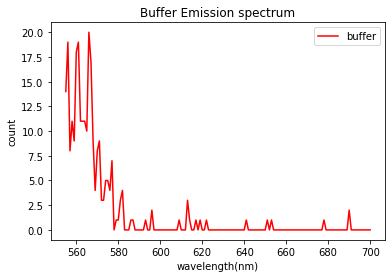

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

buffer = pd.read_csv('01_buffer_em.csv', sep=',')
buffer_np = (buffer[["lambda","count"]].dropna(how="any")).values

D_only = pd.read_csv('02_D_only_em.csv', sep=',')
D_only_np = (D_only[["lambda","count"]].dropna(how="any")).values
D_only_np[:,1] -= buffer_np[:,1]

DA_close = pd.read_csv('03_close_em.csv', sep=',')
DA_close_np = (DA_close[["lambda","count"]].dropna(how="any")).values
DA_close_np[:,1] -= buffer_np[:,1]

DA_far = pd.read_csv('04_far_em.csv', sep=',')
DA_far_np = (DA_far[["lambda","count"]].dropna(how="any")).values
DA_far_np[:,1] -= buffer_np[:,1]

plt.plot(buffer_np[:,0],buffer_np[:,1],'r-',label='buffer')
plt.xlabel('wavelength(nm)')
plt.ylabel('count')
plt.legend(loc="upper right")
plt.title('Buffer Emission spectrum')
plt.show()

### Donor only spectrum

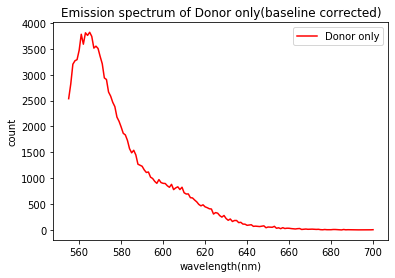

In [3]:
plt.plot(D_only_np[:,0],D_only_np[:,1],'r-',label='Donor only')

plt.xlabel('wavelength(nm)')
plt.ylabel('count')
plt.legend(loc="upper right")
plt.title('Emission spectrum of Donor only(baseline corrected)')
plt.show()

### Donor and Acceptor are close

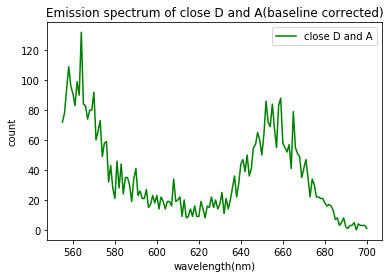

In [4]:
plt.plot(DA_close_np[:,0],DA_close_np[:,1],'g-',label='close D and A')

plt.xlabel('wavelength(nm)')
plt.ylabel('count')
plt.legend(loc="upper right")
plt.title('Emission spectrum of close D and A(baseline corrected)')
plt.show()

 ### Donor and acceptor are distant

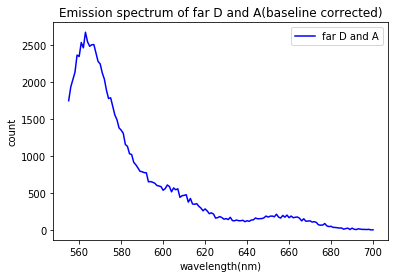

In [5]:
plt.plot(DA_far_np[:,0],DA_far_np[:,1],'b-',label='far D and A')

plt.xlabel('wavelength(nm)')
plt.ylabel('count')
plt.legend(loc="upper right")
plt.title('Emission spectrum of far D and A(baseline corrected)')
plt.show()

### Merged plot of Emission spectrum

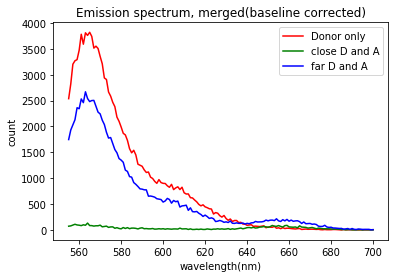

In [6]:
plt.plot(D_only_np[:,0],D_only_np[:,1],'r-',label='Donor only')
plt.plot(DA_close_np[:,0],DA_close_np[:,1],'g-',label='close D and A')
plt.plot(DA_far_np[:,0],DA_far_np[:,1],'b-',label='far D and A')

plt.xlabel('wavelength(nm)')
plt.ylabel('count')
plt.legend(loc="upper right")
plt.title('Emission spectrum, merged(baseline corrected)')
plt.show()

## Lifetime Data

1. Dd : D only, decay data
2. DAcd : close D and A, decay data
3. DAfd : far D and A, decay data

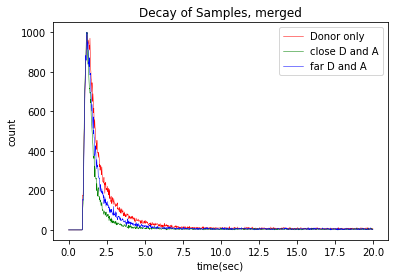

In [7]:
Dd = pd.read_csv('05_D_decay.csv', sep=',')
Dd_np = (Dd[["time","count"]].dropna(how="any")).values
DAcd = pd.read_csv('06_DAc_decay.csv', sep=',')
DAcd_np = (DAcd[["time","count"]].dropna(how="any")).values
DAfd = pd.read_csv('07_DAf_decay.csv', sep=',')
DAfd_np = (DAfd[["time","count"]].dropna(how="any")).values

A = plt.plot(Dd_np[:,0],Dd_np[:,1],'r-',label='Donor only')
B = plt.plot(DAcd_np[:,0],DAcd_np[:,1],'g-',label='close D and A')
C = plt.plot(DAfd_np[:,0],DAfd_np[:,1],'b-',label='far D and A')

plt.setp(A, linewidth=0.5)
plt.setp(B, linewidth=0.5)
plt.setp(C, linewidth=0.5)

plt.xlabel('time(sec)')
plt.ylabel('count')
plt.legend(loc="upper right")
plt.title('Decay of Samples, merged')
plt.show()

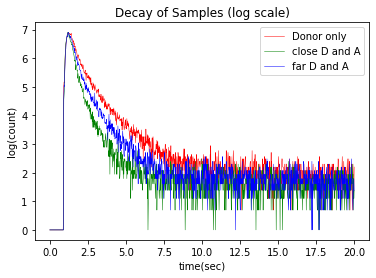

In [8]:
A = plt.plot(Dd_np[:,0],np.log(Dd_np[:,1]+1),'r-',label='Donor only')
B = plt.plot(DAcd_np[:,0],np.log(DAcd_np[:,1]+1),'g-',label='close D and A')
C = plt.plot(DAfd_np[:,0],np.log(DAfd_np[:,1]+1),'b-',label='far D and A')

plt.setp(A, linewidth=0.5)
plt.setp(B, linewidth=0.5)
plt.setp(C, linewidth=0.5)

plt.xlabel('time(sec)')
plt.ylabel('log(count)')
plt.legend(loc="upper right")
plt.title('Decay of Samples (log scale)')
plt.show()